### En este apartado utilizaremos los datos del archivo: "02_data_ready_for_visualization_salaries_mexico_INEGI.csv"
Realizaremos estadísticas descriptivas de cada estado y crearemos visualizaciones para entender y mostrar patrones de crecimiento en cada uno de los estados por sexo. Además, desarrollaremos un modelo predictivo para identificar qué estados de la República Mexicana pueden ofrecer mejores oportunidades de empleo.

### In this section, we will use the data from the file: "02_data_ready_for_visualization_salaries_mexico_INEGI.csv"
We will perform descriptive statistics for each state and create visualizations to understand and display growth patterns in each state by gender. Additionally, we will develop a predictive model to identify which states in Mexico might offer better employment opportunities.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_original = pd.read_csv("csv/02_data_ready_for_visualization_salaries_mexico_INEGI.csv", sep=";", encoding="utf-8")
df_original = df_original.drop(columns="Unnamed: 0")
df_original.head()

,Entidad Federativa,Sexo,Salario,Año,Trimestre
0,Aguascalientes,Hombres,7956.99,2005,Trimestre I
1,Aguascalientes,Mujeres,5738.09,2005,Trimestre I
2,Baja California,Hombres,11121.33,2005,Trimestre I
3,Baja California,Mujeres,8681.55,2005,Trimestre I
4,Baja California Sur,Hombres,10687.53,2005,Trimestre I


In [4]:
df_hombres = df_original.query("Sexo == 'Hombres'").sort_values(by=["Entidad Federativa", "Año"], ascending=True)
df_mujeres = df_original.query("Sexo == 'Mujeres'").sort_values(by=["Entidad Federativa", "Año"], ascending=True)
print(f"DataFrame Hombres:\n {df_hombres.head(5)} \n")
print(f"DataFrame Mujeres:\n {df_mujeres.head(5)}")

DataFrame Hombres:
     Entidad Federativa     Sexo  Salario   Año      Trimestre
0       Aguascalientes  Hombres  7956.99  2005    Trimestre I
64      Aguascalientes  Hombres  8049.33  2005   Trimestre II
128     Aguascalientes  Hombres  8228.39  2005  Trimestre III
192     Aguascalientes  Hombres  8162.13  2005   Trimestre IV
256     Aguascalientes  Hombres  7790.18  2006    Trimestre I 

DataFrame Mujeres:
     Entidad Federativa     Sexo  Salario   Año      Trimestre
1       Aguascalientes  Mujeres  5738.09  2005    Trimestre I
65      Aguascalientes  Mujeres  6014.70  2005   Trimestre II
129     Aguascalientes  Mujeres  6458.98  2005  Trimestre III
193     Aguascalientes  Mujeres  5927.88  2005   Trimestre IV
257     Aguascalientes  Mujeres  6003.17  2006    Trimestre I


In [5]:
#Ahora agrupo por año el salario por sexo para evitar tenerlo separado por trimestre 
df_promedio_general = df_original.groupby(['Entidad Federativa', 'Año', 'Sexo'])['Salario'].mean().reset_index()
df_promedio_hombres = df_hombres.groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_promedio_mujeres = df_mujeres.groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()

#Verificamos que se haya realizado bien la instruccion
print(f"DataFrame Promedio General:\n {df_promedio_general.head(5)} \n")
print(f"DataFrame Promedio Hombres:\n {df_promedio_hombres.head(5)} \n")
print(f"DataFrame Promedio Mujeres:\n {df_promedio_mujeres.head(5)}")

DataFrame Promedio General:
   Entidad Federativa   Año     Sexo    Salario
0     Aguascalientes  2005  Hombres  8099.2100
1     Aguascalientes  2005  Mujeres  6034.9125
2     Aguascalientes  2006  Hombres  8176.7700
3     Aguascalientes  2006  Mujeres  5972.6925
4     Aguascalientes  2007  Hombres  8163.3200 

DataFrame Promedio Hombres:
   Entidad Federativa   Año   Salario
0     Aguascalientes  2005  8099.210
1     Aguascalientes  2006  8176.770
2     Aguascalientes  2007  8163.320
3     Aguascalientes  2008  8284.275
4     Aguascalientes  2009  7524.795 

DataFrame Promedio Mujeres:
   Entidad Federativa   Año    Salario
0     Aguascalientes  2005  6034.9125
1     Aguascalientes  2006  5972.6925
2     Aguascalientes  2007  5928.1400
3     Aguascalientes  2008  6026.1525
4     Aguascalientes  2009  5734.3700


### Vamos a crear nuestras visualizaciones

### Let´s create our visualizations

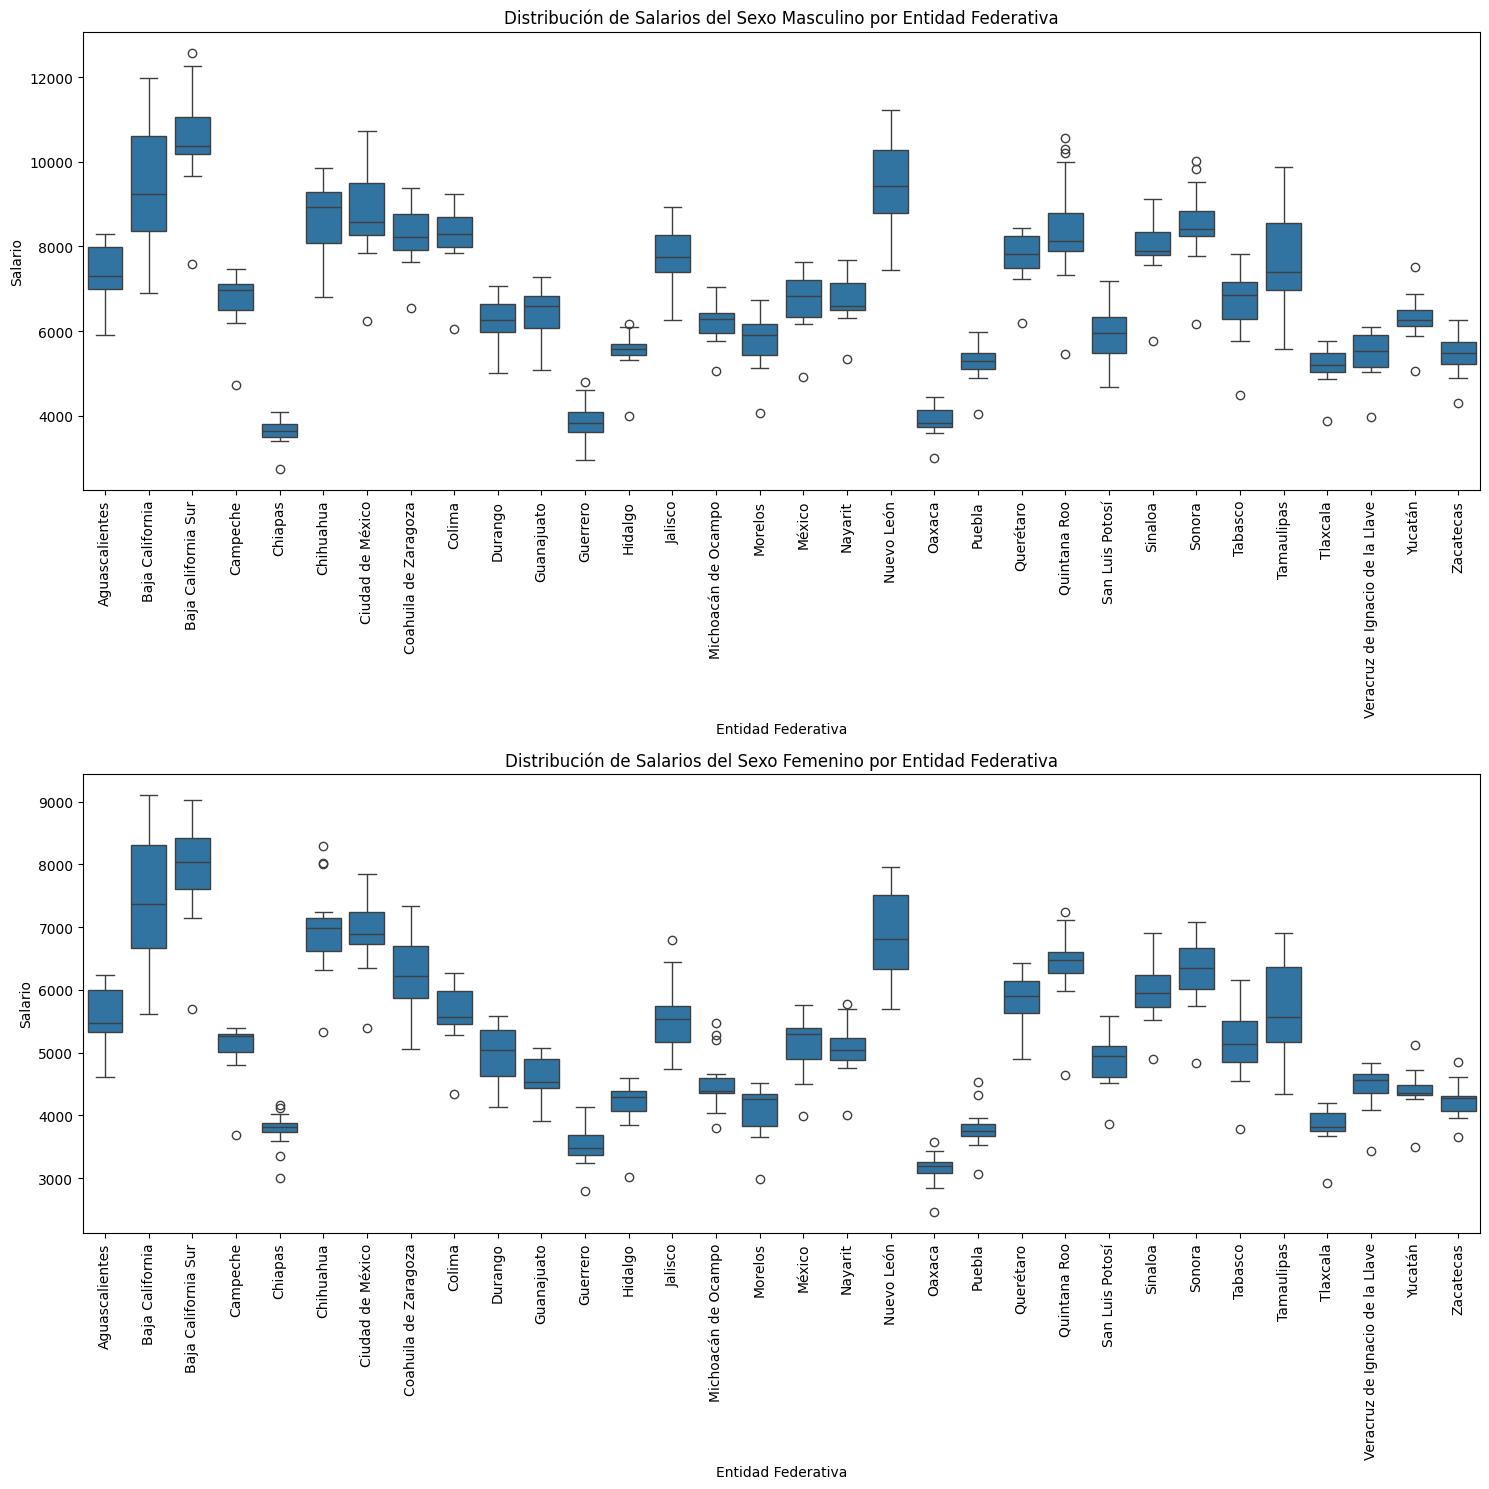

In [6]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

# Grafico de salarios Hombres
sns.boxplot(ax=axes[0], data=df_promedio_hombres, x='Entidad Federativa', y='Salario')
axes[0].set_xticks(range(len(df_promedio_hombres['Entidad Federativa'].unique())))
axes[0].set_xticklabels(df_promedio_hombres['Entidad Federativa'].unique(), rotation=90)
axes[0].set_title('Distribución de Salarios del Sexo Masculino por Entidad Federativa')

# Gráfico de salarios Mujeres
sns.boxplot(ax=axes[1], data=df_promedio_mujeres, x='Entidad Federativa', y='Salario')
axes[1].set_xticks(range(len(df_promedio_mujeres['Entidad Federativa'].unique())))
axes[1].set_xticklabels(df_promedio_mujeres['Entidad Federativa'].unique(), rotation=90)
axes[1].set_title('Distribución de Salarios del Sexo Femenino por Entidad Federativa')

# Ajustar el layout y mostrar las gráficas
plt.tight_layout() # Ajustar el layout para evitar superposición de gráficas
plt.show() # Mostrar las gráficas


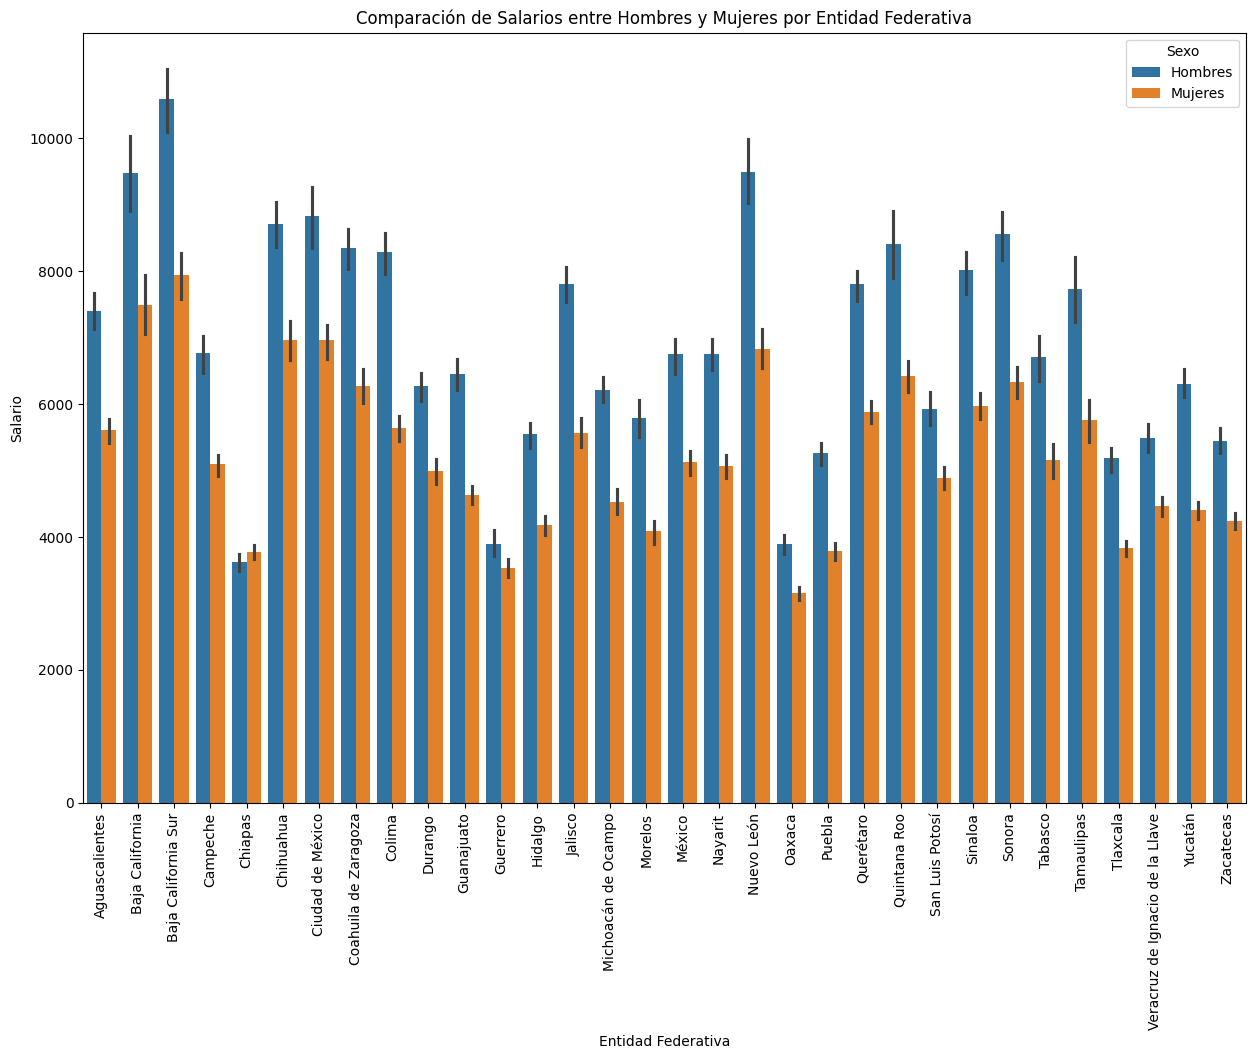

In [7]:
plt.figure(figsize=(15, 10))
sns.barplot(data=df_promedio_general, x='Entidad Federativa', y='Salario', hue='Sexo')
plt.xticks(rotation=90)
plt.title('Comparación de Salarios entre Hombres y Mujeres por Entidad Federativa')
plt.show()

In [8]:
# Voy a separar aún mas la información, esta vez por zona
zona_noroeste = ["Baja California", "Baja California Sur","Chihuahua", "Durango", "Sinaloa", "Sonora"]
zona_noreste = ["Coahuila de Zaragoza", "Nuevo León", "Tamaulipas"]
zona_occidente = ["Nayarit", "Jalisco", "Colima", "Michoacán de Ocampo"]
zona_centroNorte = ["Aguascalientes", "Guanajuato", "San Luis Potosí", "Zacatecas", "Querétaro"]
zona_centroSur = ["Ciudad de México", "México", "Morelos"]
zona_oriente = ["Puebla", "Veracruz de Ignacio de la Llave", "Tlaxcala", "Hidalgo"]
zona_sureste = ["Campeche", "Quintana Roo", "Tabasco", "Yucatán"]
zona_suroeste = ["Chiapas", "Guerrero", "Oaxaca"]



In [9]:
df_zona_noroeste = df_promedio_general.query('`Entidad Federativa` in @zona_noroeste').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_noreste = df_promedio_general.query('`Entidad Federativa` in @zona_noreste').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_occidente = df_promedio_general.query('`Entidad Federativa` in @zona_occidente').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_centroNorte = df_promedio_general.query('`Entidad Federativa` in @zona_centroNorte').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_centroSur = df_promedio_general.query('`Entidad Federativa` in @zona_centroSur').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_oriente = df_promedio_general.query('`Entidad Federativa` in @zona_oriente').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_sureste = df_promedio_general.query('`Entidad Federativa` in @zona_sureste').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()
df_zona_suroeste = df_promedio_general.query('`Entidad Federativa` in @zona_suroeste').groupby(['Entidad Federativa', 'Año'])['Salario'].mean().reset_index()

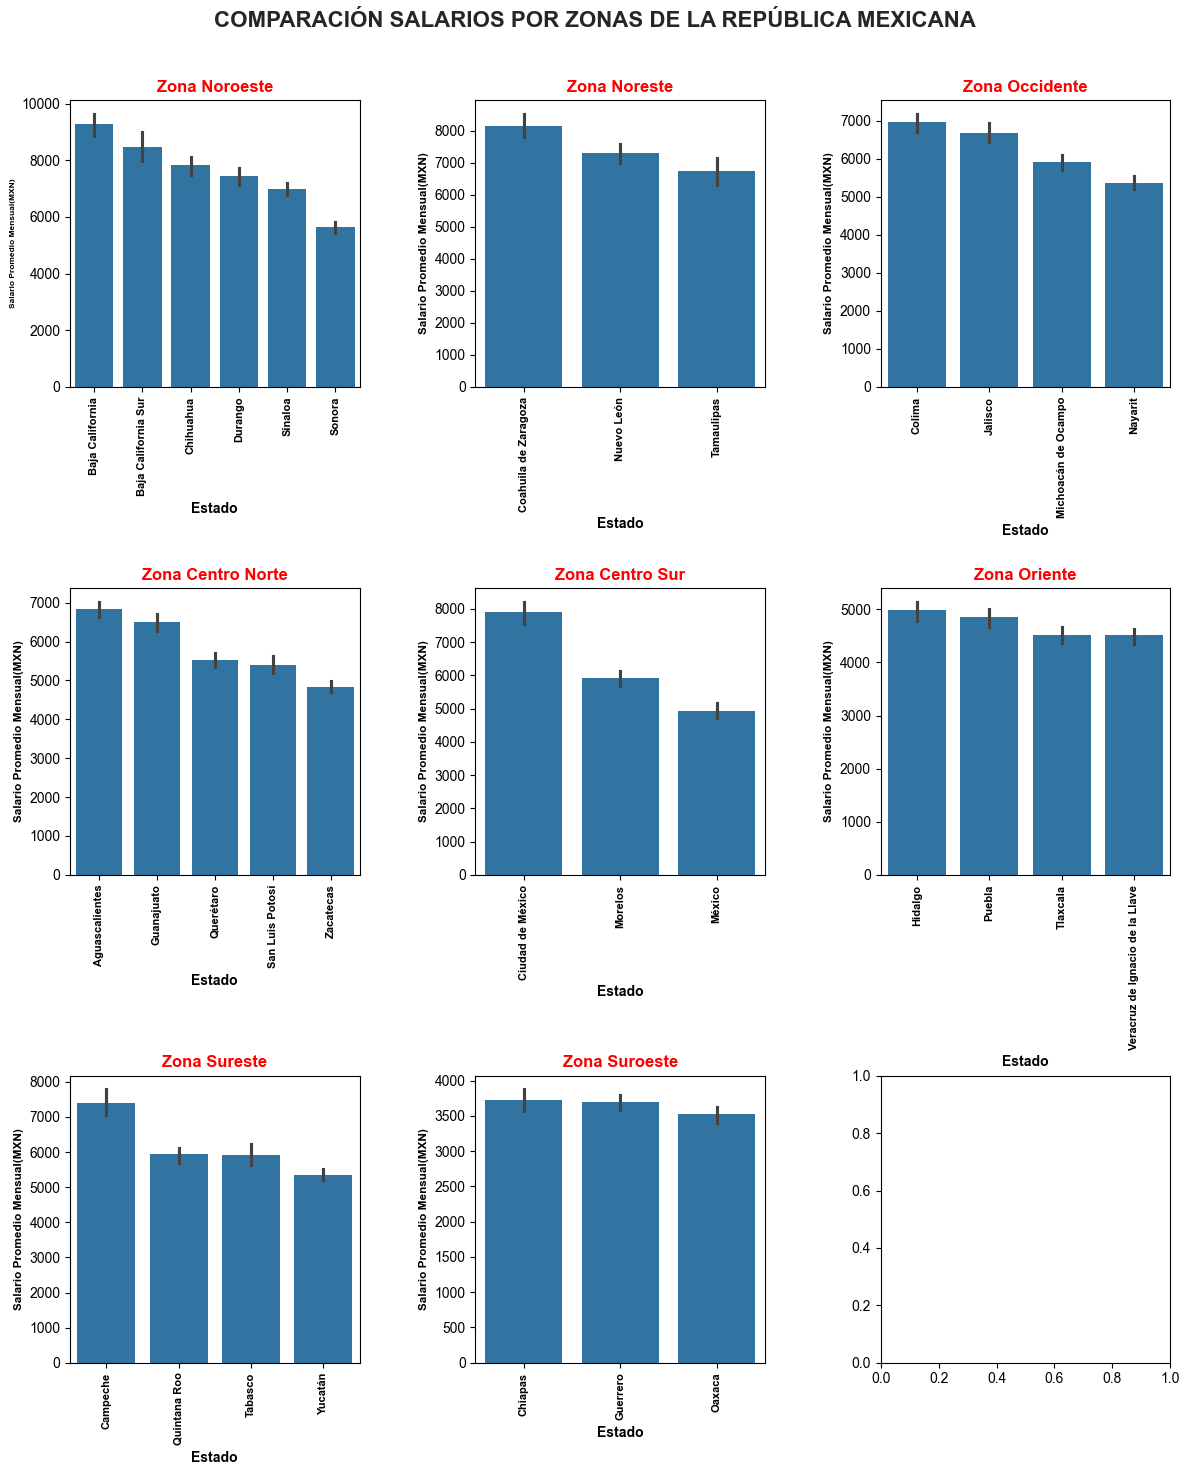

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(12,15))
# Grafico de salarios promedio Zona Noroeste
order = df_zona_noroeste.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[0,0], data=df_zona_noroeste, x='Entidad Federativa', y='Salario', order=order)
axes[0,0].set_xticks(range(len(df_zona_noroeste['Entidad Federativa'].unique())))
axes[0,0].set_xticklabels(df_zona_noroeste['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[0,0].set_title('Zona Noroeste', fontweight='bold', color='red')
axes[0,0].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=6, fontweight='bold')
axes[0,0].set_xlabel("Estado", fontsize=10, fontweight='bold')


# Grafico de salarios promedio Zona Noreste
orderzn = df_zona_noreste.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[0,1], data=df_zona_noreste, x='Entidad Federativa', y='Salario', order=orderzn)
axes[0,1].set_xticks(range(len(df_zona_noreste['Entidad Federativa'].unique())))
axes[0,1].set_xticklabels(df_zona_noreste['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[0,1].set_title('Zona Noreste',fontweight='bold', color='red')
axes[0,1].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[0,1].set_xlabel("Estado", fontsize=10, fontweight='bold')


#Grafico de salarios promedio Zona Occidente
orderzo = df_zona_occidente.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[0,2], data=df_zona_occidente, x='Entidad Federativa', y='Salario', order=orderzo)
axes[0,2].set_xticks(range(len(df_zona_occidente['Entidad Federativa'].unique())))
axes[0,2].set_xticklabels(df_zona_occidente['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[0,2].set_title('Zona Occidente',fontweight='bold', color='red')
axes[0,2].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[0,2].set_xlabel("Estado", fontsize=10, fontweight='bold')

#Grafico de salarios promedio Zona Centro Norte
ordercn = df_zona_centroNorte.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[1,0], data=df_zona_centroNorte, x='Entidad Federativa', y='Salario', order=ordercn)
axes[1,0].set_xticks(range(len(df_zona_centroNorte['Entidad Federativa'].unique())))
axes[1,0].set_xticklabels(df_zona_centroNorte['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[1,0].set_title('Zona Centro Norte',fontweight='bold', color='red' )
axes[1,0].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[1,0].set_xlabel("Estado", fontsize=10, fontweight='bold')

#Grafico de salarios promedio Zona Centro Sur
ordercs = df_zona_centroSur.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[1,1], data=df_zona_centroSur, x='Entidad Federativa', y='Salario', order=ordercs)
axes[1,1].set_xticks(range(len(df_zona_centroSur['Entidad Federativa'].unique())))
axes[1,1].set_xticklabels(df_zona_centroSur['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[1,1].set_title('Zona Centro Sur',fontweight='bold', color='red' )
axes[1,1].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[1,1].set_xlabel("Estado", fontsize=10, fontweight='bold')

#Grafico de salarios promedio Zona Oriente
ordero = df_zona_oriente.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[1,2], data=df_zona_oriente, x='Entidad Federativa', y='Salario', order=ordero)
axes[1,2].set_xticks(range(len(df_zona_oriente['Entidad Federativa'].unique())))
axes[1,2].set_xticklabels(df_zona_oriente['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[1,2].set_title('Zona Oriente',fontweight='bold', color='red' )
axes[1,2].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[1,2].set_xlabel("Estado", fontsize=10, fontweight='bold')

#Grafico de salarios promedio Zona Sureste
orderse = df_zona_sureste.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[2,0], data=df_zona_sureste, x='Entidad Federativa', y='Salario', order=orderse)
axes[2,0].set_xticks(range(len(df_zona_sureste['Entidad Federativa'].unique())))
axes[2,0].set_xticklabels(df_zona_sureste['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[2,0].set_title('Zona Sureste',fontweight='bold', color='red' )
axes[2,0].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[2,0].set_xlabel("Estado", fontsize=10, fontweight='bold')

df_zona_suroeste
#Grafico de salarios promedio Zona Suroeste
orderso = df_zona_suroeste.groupby('Entidad Federativa')['Salario'].mean().sort_values(ascending=False).index
sns.barplot(ax=axes[2,1], data=df_zona_suroeste, x='Entidad Federativa', y='Salario', order=orderso)
axes[2,1].set_xticks(range(len(df_zona_suroeste['Entidad Federativa'].unique())))
axes[2,1].set_xticklabels(df_zona_suroeste['Entidad Federativa'].unique(), rotation=90, fontsize=8,fontweight='bold')
axes[2,1].set_title('Zona Suroeste',fontweight='bold', color='red' )
axes[2,1].set_ylabel("Salario Promedio Mensual(MXN)", fontsize=8.5, fontweight='bold')
axes[2,1].set_xlabel("Estado", fontsize=10, fontweight='bold')

# Ajustar el layout y mostrar las gráficas
sns.set_style("whitegrid", {'grid.linestyle': '--'})
fig.suptitle("COMPARACIÓN SALARIOS POR ZONAS DE LA REPÚBLICA MEXICANA", fontsize=16, fontweight='bold')
plt.tight_layout() # Ajustar el layout para evitar superposición de gráficas
fig.subplots_adjust(top=0.92, wspace=0.4, hspace=0.7)
plt.show() # Mostrar las gráficas

#### Evolución de los salarios en las principales ciudades de México


In [65]:
# Creo sus respectivos Datasets

df_ciudad_Mexico = df_promedio_general.query('`Entidad Federativa` == "Ciudad de México"')
df_nuevoLeon = df_promedio_general.query('`Entidad Federativa` == "Nuevo León"')
df_Jalisco = df_promedio_general.query('`Entidad Federativa` == "Jalisco"')

df_ciudad_Mexico['Año'] = df_ciudad_Mexico['Año'].astype(str)
df_nuevoLeon['Año'] = df_nuevoLeon['Año'].astype(str)
df_Jalisco['Año'] = df_Jalisco['Año'].astype(str)

C:\Users\carlo\AppData\Local\Temp\ipykernel_19596\1231512801.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad_Mexico['Año'] = df_ciudad_Mexico['Año'].astype(str)
C:\Users\carlo\AppData\Local\Temp\ipykernel_19596\1231512801.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevoLeon['Año'] = df_nuevoLeon['Año'].astype(str)
C:\Users\carlo\AppData\Local\Temp\ipykernel_19596\1231512801.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

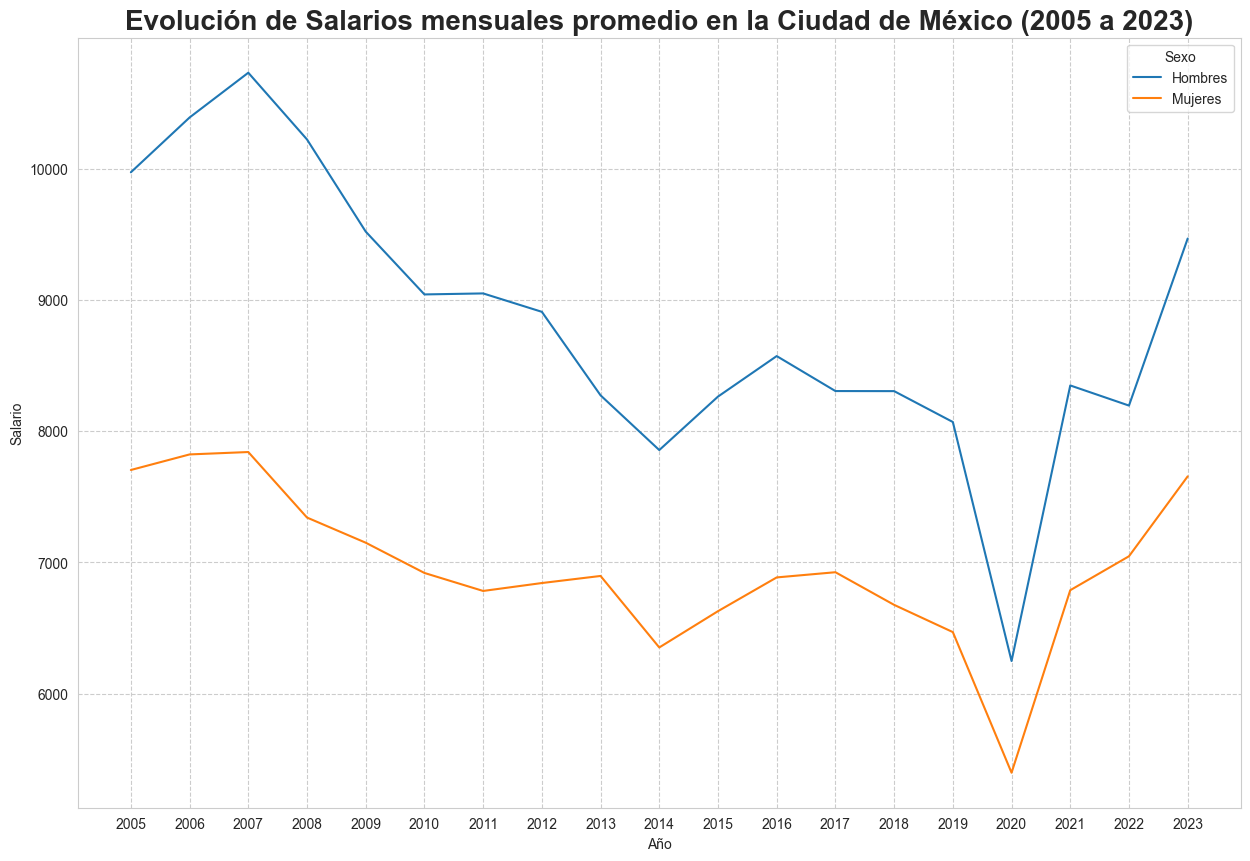

In [62]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_ciudad_Mexico, x='Año', y = 'Salario', hue='Sexo')
plt.title('Evolución de Salarios mensuales promedio en la Ciudad de México (2005 a 2023)', fontsize = 20, fontweight='bold')
plt.show()

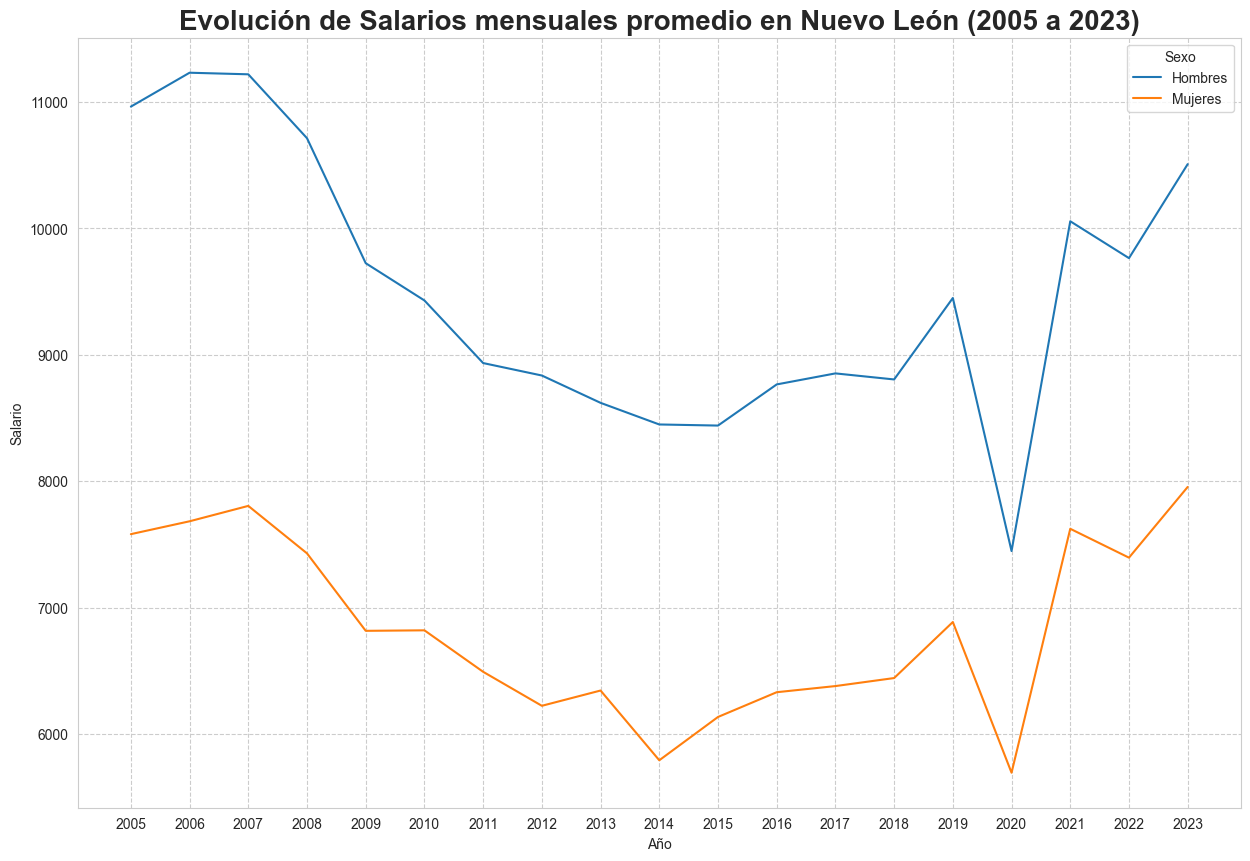

In [69]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_nuevoLeon, x='Año', y = 'Salario', hue='Sexo')
plt.title('Evolución de Salarios mensuales promedio en Nuevo León (2005 a 2023)', fontsize = 20, fontweight='bold')
plt.show()

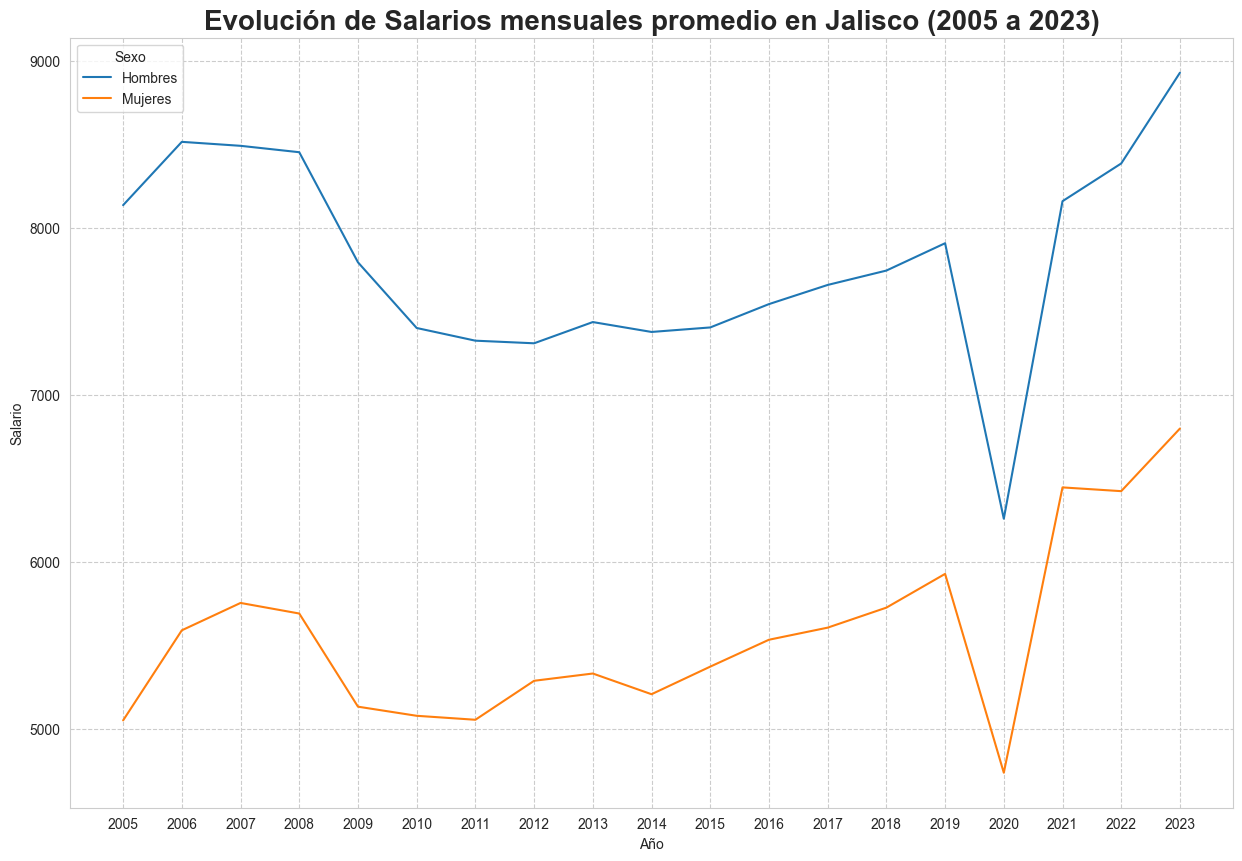

In [70]:
plt.figure(figsize=(15, 10))
sns.lineplot(data = df_Jalisco, x='Año', y = 'Salario', hue='Sexo')
plt.title('Evolución de Salarios mensuales promedio en Jalisco (2005 a 2023)', fontsize = 20, fontweight='bold')
plt.show()

#### A pesar de la percepción común de que los salarios han aumentado con el tiempo, los datos muestran una tendencia general de disminución en los salarios para ambos sexos las principales estados de México. Aunque ha habido un aumento en el salario promedio desde 2005, este ha sido moderado y el salario de los hombres ha experimentado una mayor recuperación que el de las mujeres. La caída más significativa en los salarios se produjo durante la pandemia de COVID-19, cuando se observó un descenso notable en 2020. Esta disminución ha tenido un impacto considerable en la percepción económica de las familias, exacerbando las desigualdades salariales existentes. A pesar de un ligero cierre en la brecha salarial entre hombres y mujeres, la diferencia sigue siendo significativa, lo que indica la necesidad de continuar con los esfuerzos para lograr una mayor equidad salarial.